In [0]:
%pylab inline

In [1]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd

/data/dataiku/dss_data/code-envs/python/QB_HCP_propensity/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
# Example: load a DSS dataset as a Pandas dataframe
hospital_mortality_data = dataiku.Dataset("Hospital_Mortality_Dataset")
hospital_mortality_data_df = hospital_mortality_data.get_dataframe()

In [3]:
# Data Science Questions:

# Which age group is most in the hospital?
# Which age group of patients dies more in the hospital?
# Which gender is the most prevalent in the hospital?
# How many patients died in the hospital with atrial fibrillation?
# How many patients in the hospital have depression?
# How many patients in the hospital have depression?
# What is the rate of non-survived patients with hypertension?
# How many patients Alive in the hospital they are with renal failure?
# How many patients Death in the hospital they are with Hyperlipemia ?
# How many patients Death in the hospital they are with Anemia?


In [4]:
hospital_mortality_data_df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [6]:
import pandas as pd
import numpy as np
import seaborn as sbn
import seaborn as sb
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
import warnings


In [8]:
hospital_mortality_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [9]:
len(hospital_mortality_data_df)


1177

In [10]:
hospital_mortality_data_df.drop(['group','ID'],axis=1,inplace=True)


In [11]:
hospital_mortality_data_df.isnull().sum()


outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocyte                  145
PT      

<AxesSubplot:>

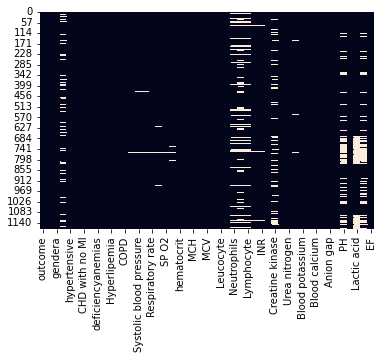

In [12]:
sns.heatmap(hospital_mortality_data_df.isnull(), cbar=False)

In [13]:
col = ['gendera', 'hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'outcome']

In [15]:
corr = hospital_mortality_data_df[col].corr()

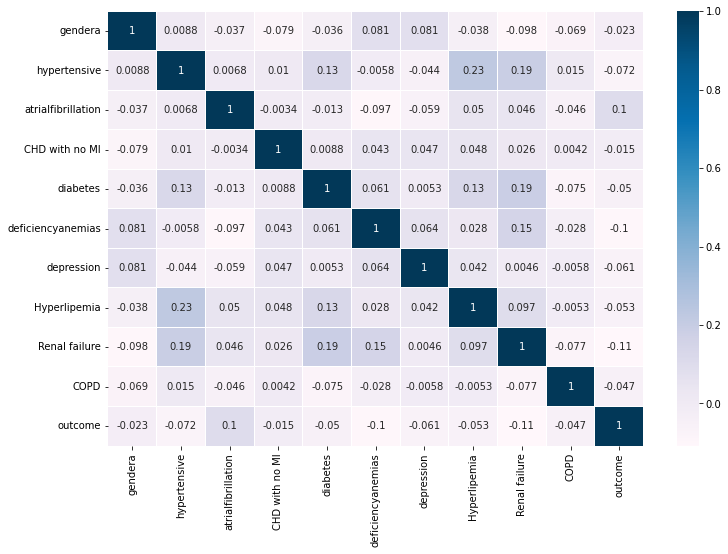

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='PuBu',linewidths=0.01,linecolor="white");

### Which age group is most in the hospital?

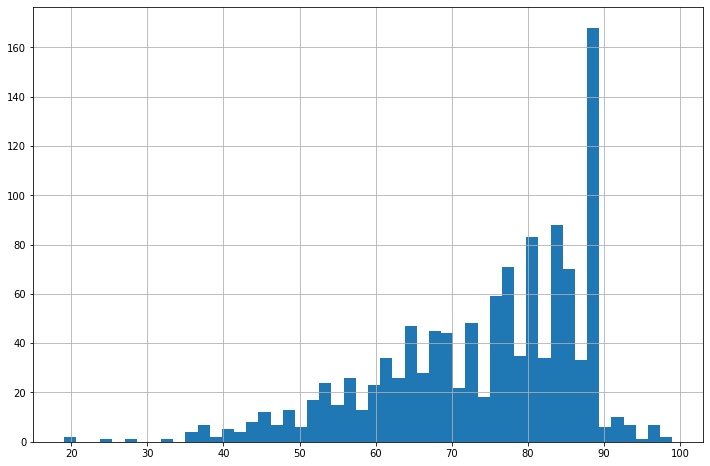

In [18]:


import matplotlib.pyplot as plt
hospital_mortality_data_df.age.hist(bins = 50, figsize=(12,8))
plt.show()

#### Here we can see that 89 age group are most in the hospital



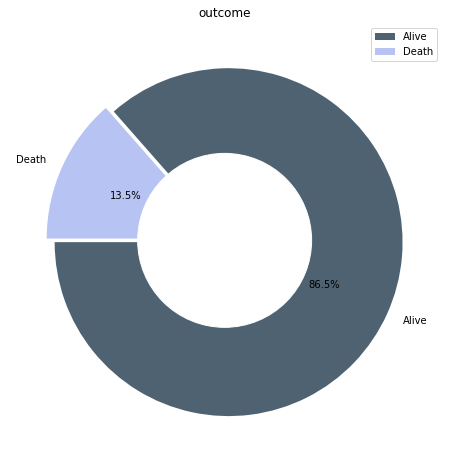

In [21]:
plt.figure(figsize=(12,8))
plt.title("outcome")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(hospital_mortality_data_df.outcome.value_counts(), explode=(0.025,0.025),  labels=['Alive','Death'], colors=['#4F6272', '#B7C3F3'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()


#### More then 15% patients are died in the hospital remaining patients were alive



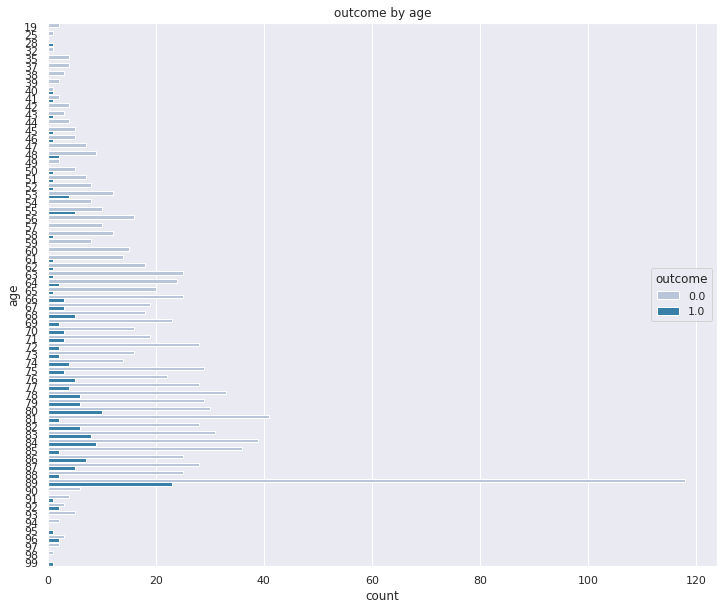

In [23]:
plt.figure(figsize=(12,10))
sns.set_theme(style="darkgrid", color_codes=True)
ax = sns.countplot(y="age", hue="outcome", data=hospital_mortality_data_df, palette="PuBu")
plt.title("outcome by age")
plt.show()

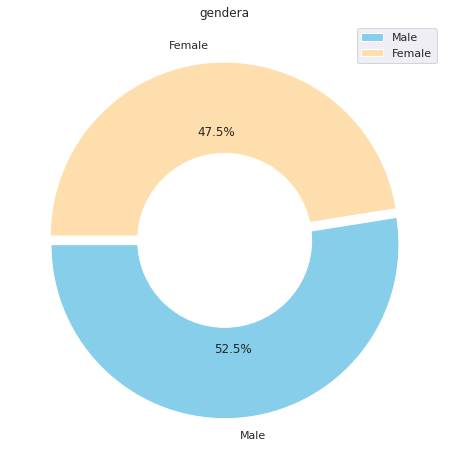

In [24]:
plt.figure(figsize=(12,8))
plt.title("gendera")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(hospital_mortality_data_df.gendera.value_counts(), explode=(0.025,0.025),  labels=['Male','Female'], colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [25]:
df = hospital_mortality_data_df 

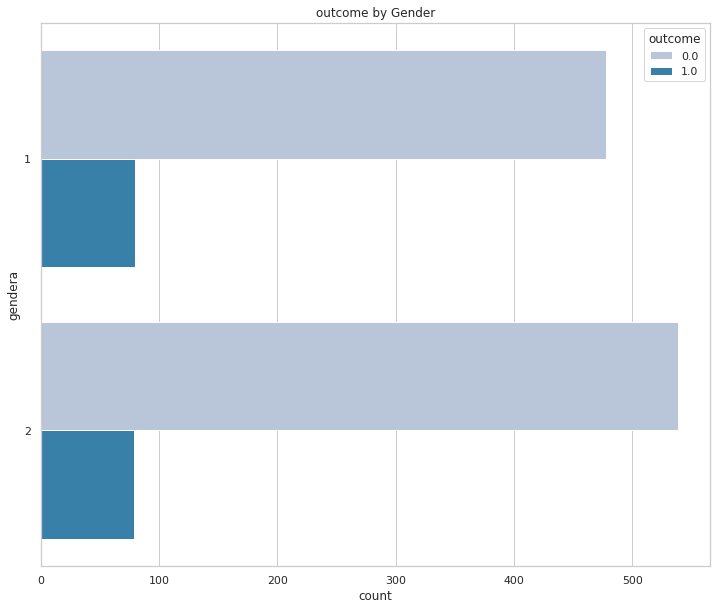

In [26]:
plt.figure(figsize=(12,10))
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.countplot(y="gendera", hue="outcome", data=df, palette="PuBu")
plt.title("outcome by Gender")
plt.show()

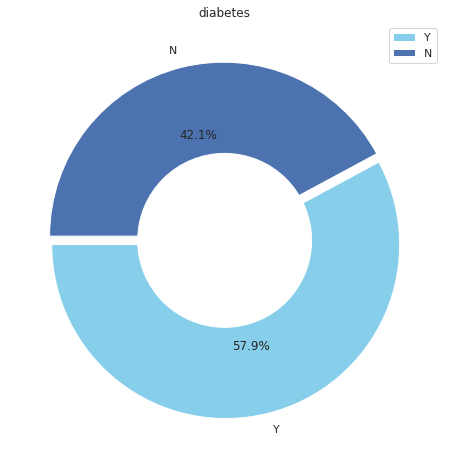

In [27]:
plt.figure(figsize=(12,8))
plt.title("diabetes")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.diabetes.value_counts(), explode=(0.025,0.025), labels=['Y','N'], colors=['skyblue','b'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

/data/dataiku/dss_data/code-envs/python/QB_HCP_propensity/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


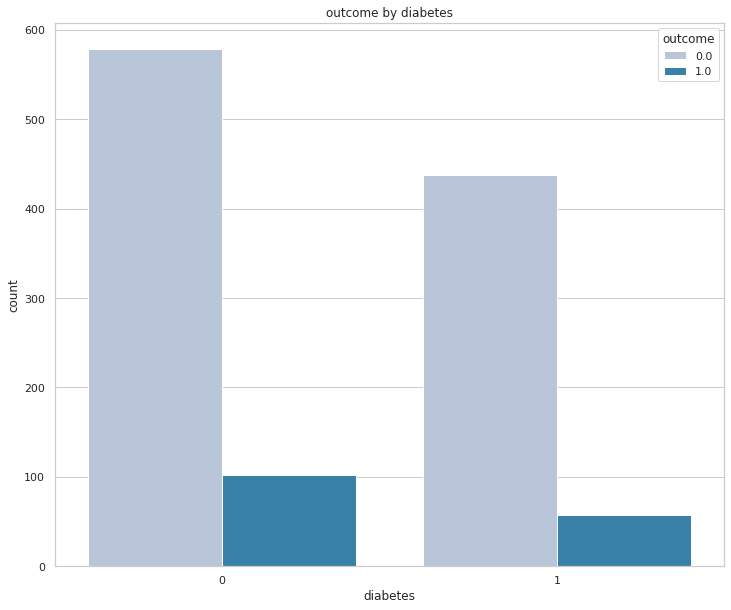

In [28]:
plt.figure(figsize=(12,10))
sns.countplot(df['diabetes'],hue=df['outcome'],palette="PuBu")
plt.title("outcome by diabetes")
plt.show()

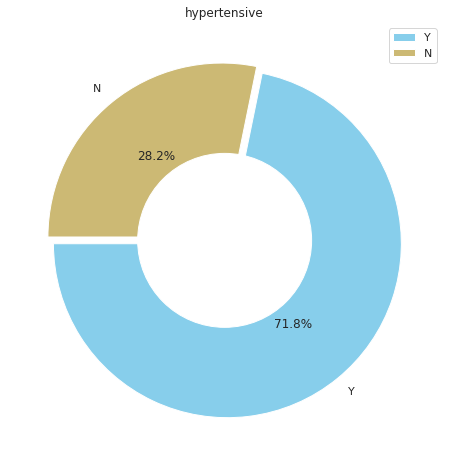

In [29]:
plt.figure(figsize=(12,8))
plt.title("hypertensive")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.hypertensive.value_counts(), explode=(0.025,0.025), labels=['Y','N'], colors=['skyblue','y'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

/data/dataiku/dss_data/code-envs/python/QB_HCP_propensity/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


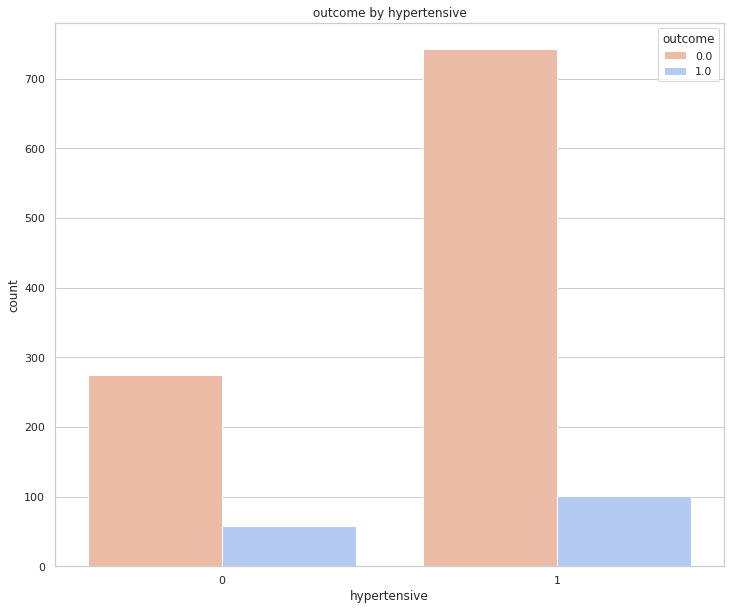

In [30]:
plt.figure(figsize=(12,10))
sns.countplot(df['hypertensive'],hue=df['outcome'],palette="coolwarm_r")
plt.title("outcome by hypertensive")
plt.show()


/data/dataiku/dss_data/code-envs/python/QB_HCP_propensity/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


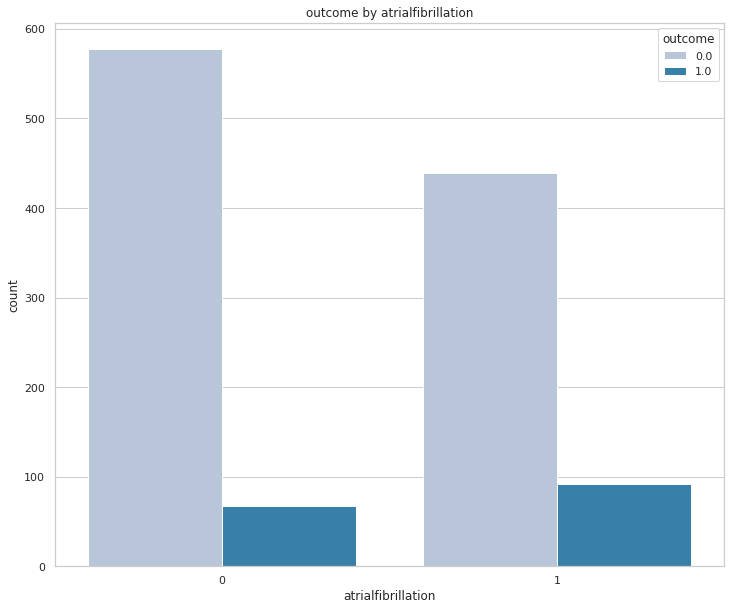

In [31]:
plt.figure(figsize=(12,10))
sns.countplot(df['atrialfibrillation'],hue=df['outcome'],palette="PuBu")
plt.title("outcome by atrialfibrillation")
plt.show()

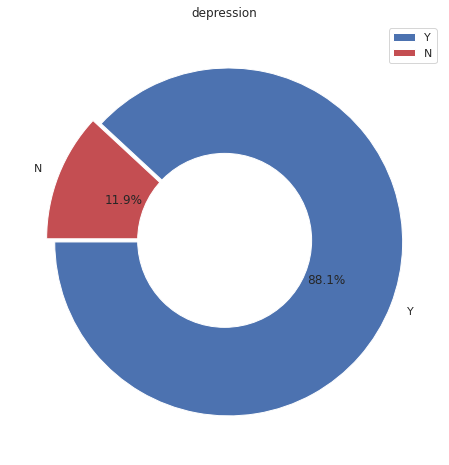

In [32]:
plt.figure(figsize=(12,8))
plt.title("depression")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.depression.value_counts(), explode=(0.025,0.025), labels=['Y','N'], colors=['b','r'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

<AxesSubplot:ylabel='Density'>

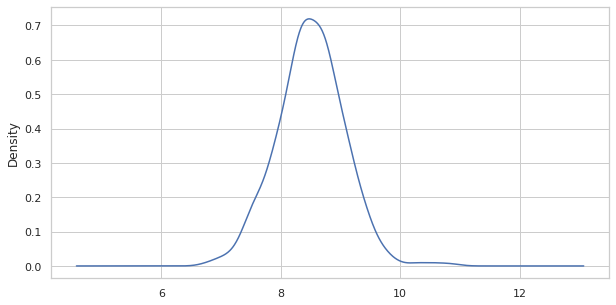

In [33]:
plt.figure(figsize=(10,5))
df['Blood calcium'].plot(kind='kde')

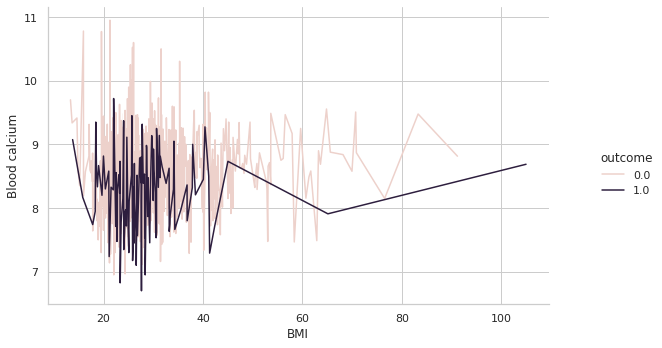

In [34]:
from seaborn.relational import relplot
f= sns.relplot(data=df, x="BMI", y="Blood calcium", hue="outcome",kind="line")
f.fig.set_figwidth(10)
f.fig.set_figheight(5)

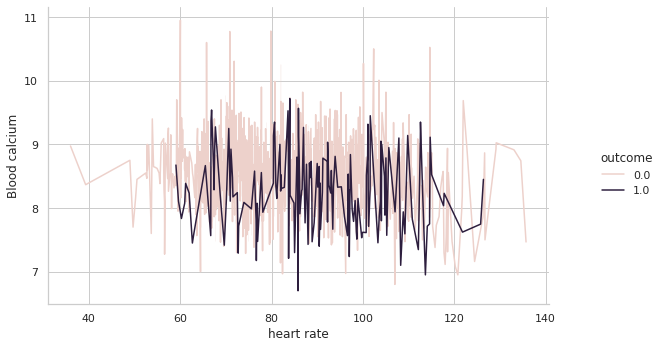

In [35]:
from seaborn.relational import relplot
f= sns.relplot(data=df, x="heart rate", y="Blood calcium", hue="outcome",kind="line")
f.fig.set_figwidth(10)
f.fig.set_figheight(5)

#### How many patients Alive in the hospital they are with renal failure?¶


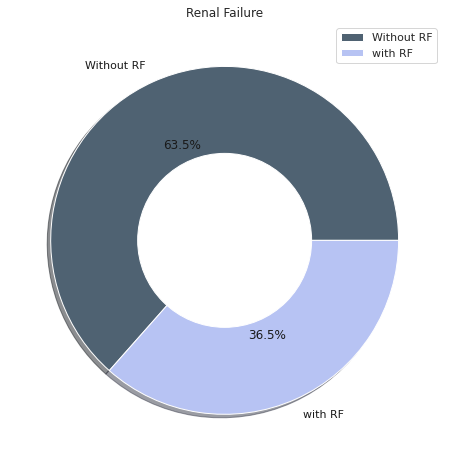

In [36]:
plt.figure(figsize=(12,8))
circle = plt.Circle((0, 0), 0.5, color='white')
plt.pie(df['Renal failure'].value_counts(sort=False), autopct='%1.1f%%', shadow=True, labels=['Without RF', 'with RF'],
        colors = ['#4F6272', '#B7C3F3'], textprops = {'color':'k'}, 
        rotatelabels=False);
plt.title('Renal Failure')
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

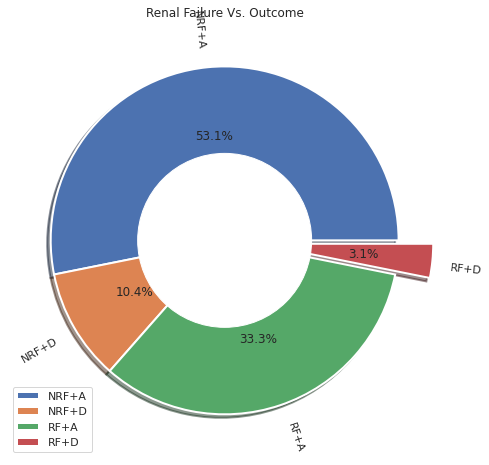

In [37]:
plt.figure(figsize=(12,8))
circle = plt.Circle((0, 0), 0.5, color='white')
plt.pie(df.groupby(['Renal failure', 'outcome']).outcome.count(), autopct='%1.1f%%', shadow=True, 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        labels = ['NRF+A', 'NRF+D', 'RF+A', 'RF+D'],
        explode=(0,0,0,0.2), rotatelabels=True)
plt.title('Renal Failure Vs. Outcome')
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

/data/dataiku/dss_data/code-envs/python/QB_HCP_propensity/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/dataiku/dss_data/code-envs/python/QB_HCP_propensity/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/dataiku/dss_data/code-envs/python/QB_HCP_propensity/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future vers

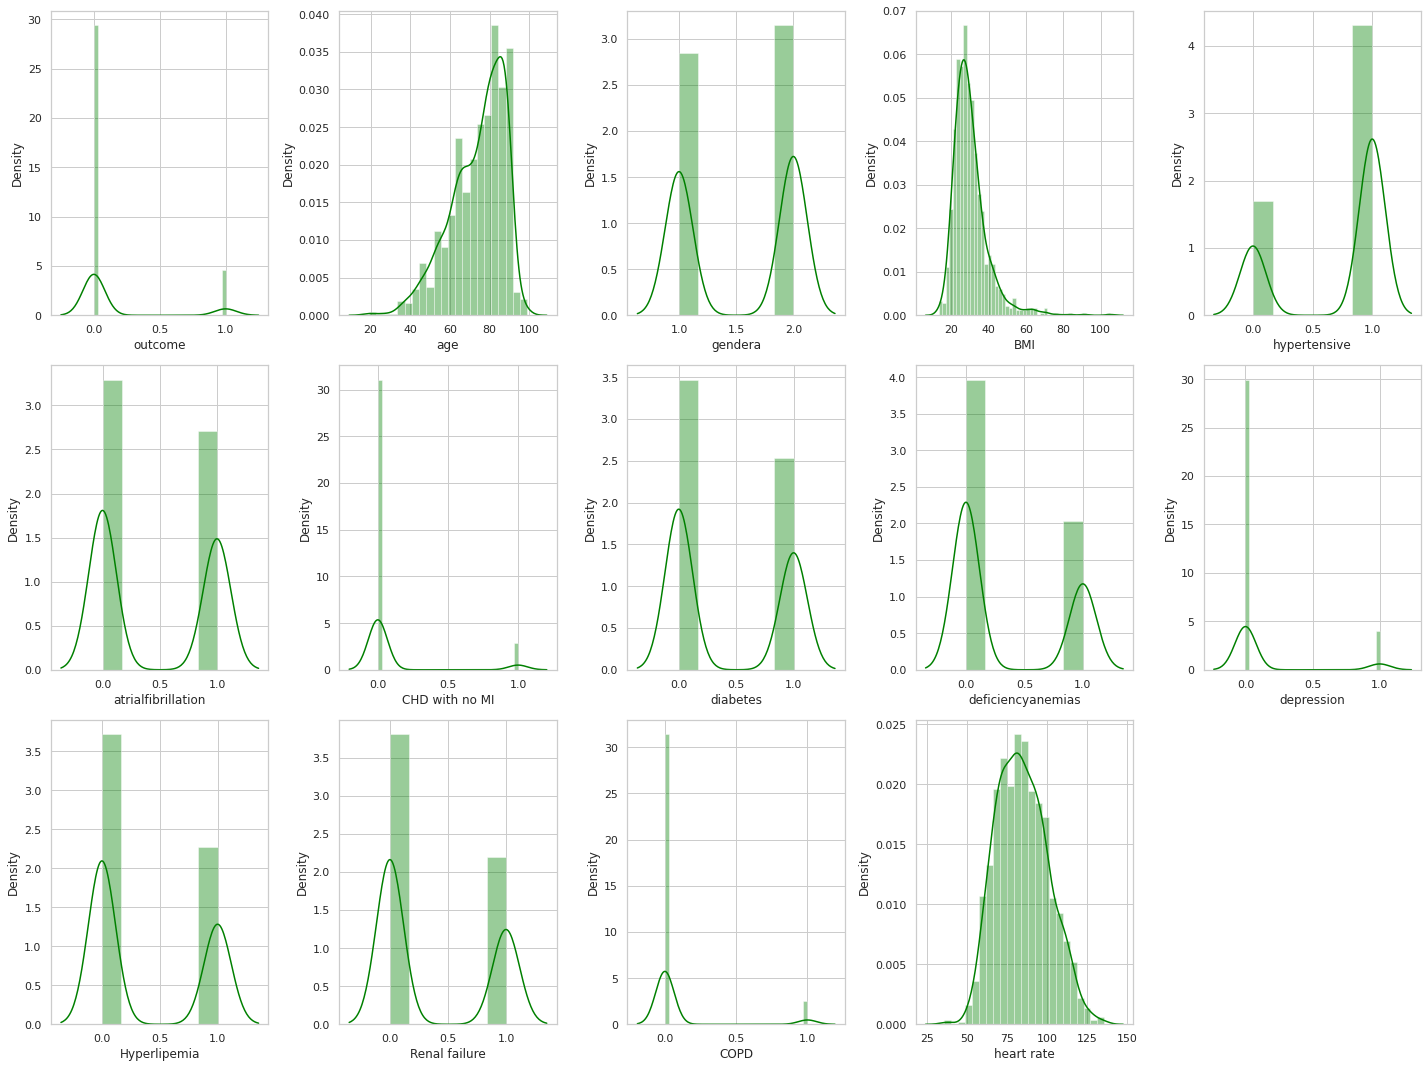

In [38]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='green')
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()